In [34]:
import missingno as msno

In [ ]:
#Creating a separate notebook for processing strava files. This is the first file created post course.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json
import re
import os
import glob
import ast

In [2]:
#Warnings are so pesky aren't they
import warnings
warnings.filterwarnings("ignore")

In [5]:
filepaths = (glob.glob('./data/raw/Strava/*'))

In [6]:
filepaths

['./data/raw/Strava/lars_activities.csv',
 './data/raw/Strava/marika_activities.csv',
 './data/raw/Strava/keith_strava.csv',
 './data/raw/Strava/claire_strava_activities.csv',
 './data/raw/Strava/Shane G Strava Data (1)',
 './data/raw/Strava/shane_activities.csv']

In [8]:
strava_raw = pd.read_csv(filepaths[3])
strava_raw.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
0,589807052,"May 17, 2016, 3:27:58 PM",Morning Ride,Ride,NaN,1791,8.34,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,590203279,"May 27, 2016, 11:43:46 PM",Afternoon Ride,Ride,NaN,1742,8.32,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,593258442,"May 30, 2016, 5:47:48 PM",GG bridge to OB,Ride,NaN,3183,12.06,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,594079803,"May 31, 2016, 3:42:24 PM",Morning Ride,Ride,NaN,1820,8.39,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594639978,"Jun 1, 2016, 1:30:33 AM",Evening Ride,Ride,NaN,1907,8.66,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
strava_run = strava_raw[strava_raw['Activity Type'] == "Run"]
strava_run.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
24,617603774,"Jun 22, 2016, 7:13:17 PM",Lunch Run - first run of 2016!,Run,NaN,2352,6.31,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,632378912,"Jul 6, 2016, 7:12:12 PM",Lunch Run,Run,NaN,1757,5.05,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,661519714,"Aug 2, 2016, 1:41:49 AM",Evening Run,Run,NaN,1951,5.01,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,664661687,"Aug 4, 2016, 7:07:50 PM",Lunch Run,Run,NaN,2487,6.14,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,666980586,"Aug 6, 2016, 9:00:22 PM",Afternoon Run,Run,NaN,1334,3.95,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
strava_run.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Relative Effort',
       'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight',
       'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed',
       'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low',
       'Elevation High', 'Max Grade', 'Average Grade',
       'Average Positive Grade', 'Average Negative Grade', 'Max Cadence',
       'Average Cadence', 'Max Heart Rate', 'Average Heart Rate', 'Max Watts',
       'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.start_time',


In [16]:
strava_run[['Distance', 'Elapsed Time', 'Average Speed', 'Average Heart Rate', 'Max Heart Rate']]

,Distance,Elapsed Time,Average Speed,Average Heart Rate,Max Heart Rate
24,6.31,2352,NaN,NaN,NaN
38,5.05,1757,NaN,NaN,NaN
52,5.01,1951,NaN,NaN,NaN
53,6.14,2487,NaN,NaN,NaN
54,3.95,1334,NaN,NaN,NaN
...,...,...,...,...,...
434,3.24,1307,2.538311,NaN,NaN
435,5.64,2459,2.459416,NaN,NaN
436,3.31,1349,2.549808,NaN,NaN
437,3.87,1545,2.515010,NaN,NaN


In [14]:
strava_run['Distance'].max()

42.66

In [15]:
#Ah it appears the data is in km.

In [17]:
strava_run['Average Heart Rate'].isna().sum()

138

In [18]:
#Looks like half of the data is missing heart rate values.

In [27]:
strava_run.columns = strava_run.columns.str.lower().str.replace(' ', '_')

In [28]:
strava_run.columns

Index(['activity_id', 'activity_date', 'activity_name', 'activity_type',
       'activity_description', 'elapsed_time', 'distance', 'relative_effort',
       'commute', 'activity_gear', 'filename', 'athlete_weight', 'bike_weight',
       'elapsed_time.1', 'moving_time', 'distance.1', 'max_speed',
       'average_speed', 'elevation_gain', 'elevation_loss', 'elevation_low',
       'elevation_high', 'max_grade', 'average_grade',
       'average_positive_grade', 'average_negative_grade', 'max_cadence',
       'average_cadence', 'max_heart_rate', 'average_heart_rate', 'max_watts',
       'average_watts', 'calories', 'max_temperature', 'average_temperature',
       'relative_effort.1', 'total_work', 'number_of_runs', 'uphill_time',
       'downhill_time', 'other_time', 'perceived_exertion',
       'translation_missing:_en-us.lib.export.portability_exporter.activities.horton_values.type',
       'translation_missing:_en-us.lib.export.portability_exporter.activities.horton_values.start_time',


In [29]:
strava_run_cols = strava_run[['activity_date', 'activity_type', 'distance', 'elapsed_time', 'moving_time', 
                              'average_speed', 'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 
                              'max_grade', 'average_grade', 'max_cadence', 'average_cadence', 'max_heart_rate', 
                              'average_heart_rate', 'calories', 'max_temperature', 'average_temperature', 
                              'weather_condition', 'weather_temperature', 'apparent_temperature', 'wind_speed']]
strava_run_cols.head()

,activity_date,activity_type,distance,elapsed_time,moving_time,average_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,...,average_cadence,max_heart_rate,average_heart_rate,calories,max_temperature,average_temperature,weather_condition,weather_temperature,apparent_temperature,wind_speed
24,"Jun 22, 2016, 7:13:17 PM",Run,6.31,2352,1476.0,NaN,131.080994,NaN,12.300000,146.899994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,"Jul 6, 2016, 7:12:12 PM",Run,5.05,1757,1753.0,NaN,33.250000,NaN,6.500000,24.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,"Aug 2, 2016, 1:41:49 AM",Run,5.01,1951,1881.0,NaN,65.944901,NaN,36.299999,86.800003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,"Aug 4, 2016, 7:07:50 PM",Run,6.14,2487,2228.0,NaN,126.550003,NaN,12.700000,144.300003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,"Aug 6, 2016, 9:00:22 PM",Run,3.95,1334,1329.0,NaN,39.841202,NaN,24.100000,58.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Create a miles column since we have distance in kilometers
strava_run_cols['distance_miles'] = strava_run_cols['distance'] * 0.621371

<AxesSubplot:>

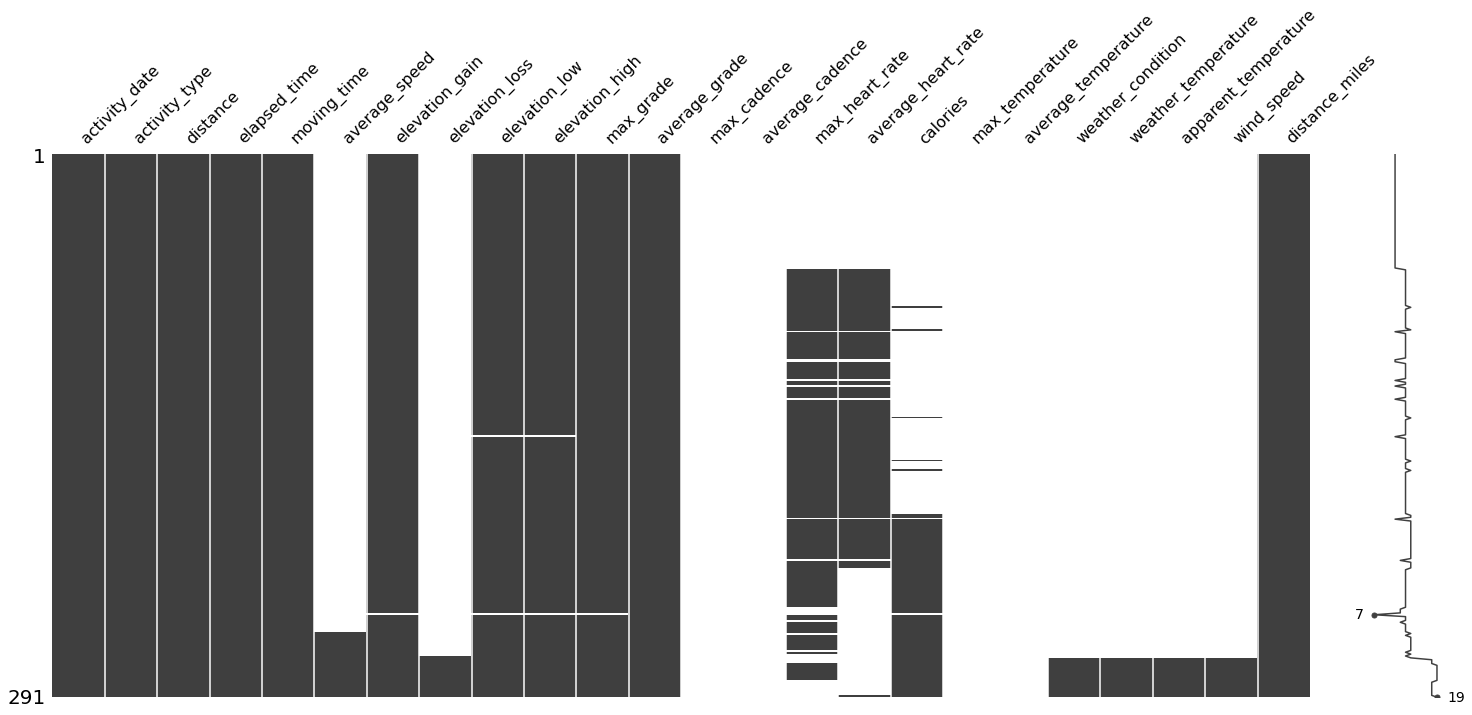

In [35]:
msno.matrix(strava_run_cols)